# Modelling a planning formula for long distance cycling

In [2]:
%load_ext autotime

time: 482 µs (started: 2021-07-25 13:47:40 -03:00)


In [3]:
import matplotlib.pyplot as plt
from dataclasses import dataclass
import pandas as pd

import statsmodels.api as sm
import pymc3 as pm
import numpy as np
import seaborn as sns

time: 4.19 s (started: 2021-07-25 13:47:40 -03:00)


In [11]:
@dataclass
class Activity():
    label: str
    distance_in_km: float
    uphill_in_m: float
    downhill_in_m: float
    wind_speed_in_kph: float
    moving_time_in_h: float
    avg_hr_in_bpm: float
    consecutive_days: int
    power: float
        
activities = [
    Activity('barretos', 430, 4958, 4750, 13, 14 + 26/60, 150, 1, None),
    Activity('cilada', 261, 3308, 3308, 0, 11 + 50/60, 151, 1, None),
    Activity('cananeia', 256, 1567, 2300, 0, 9 + 42/60, 153, 1, 123),
    Activity('pocos_2', 231, 2862, 2890, 0, 9 + 47/60, 145, 2, 116),
    Activity('curitiba_1', 228, 2519, 3250, 0, 9 + 21/60, 153, 1, None),
    Activity('curitiba_2', 212, 2870, 1950, 0, 9 + 27/60, 144, 2, None),
    Activity('campos_jordao', 205, 3310, 3310, 0, 8 + 52/60, 147, 1, None),
    Activity('pocos_3', 203, 2067, 2067, 4, 7 + 52/60, 138, 3, 114),
    Activity('gravel', 200, 2044, 2044, 0, 9 + 12/60, 153, 1, 121),
    Activity('fracassei', 195, 2428, 2600, 9, 8 + 8/60, 144, 1, 116),
    Activity('paraty', 170.2, 1485, 2485, 3, 7+32/60, 144, 2, 115),
    Activity('assou', 158, 1340, 1440, -0.5, 6+35/60, 151, 1, 133),
    Activity('pocos_1', 104, 1656, 1500, 1.0, 4+36/60, 149, 1, 123),
    Activity('...', 144, 1946, 1946, 0, 6+46/60, 152, 1, None),
    Activity('ubatuba_cunha', 113.3, 2469, 1300, -3.5, 6+11/60, 152, 1, 142),
    Activity('3morros', 89.2, 1766, 1766, 0, 4+53/60, 145, 1, 129),
    Activity('taubate_volta', 88.6, 733, 633, 1.5, 2+48/60, 145, 1, 149)
]

df = pd.DataFrame(activities)

df_with_power = df.dropna(subset=['power'])

time: 8.25 ms (started: 2021-07-25 13:49:14 -03:00)


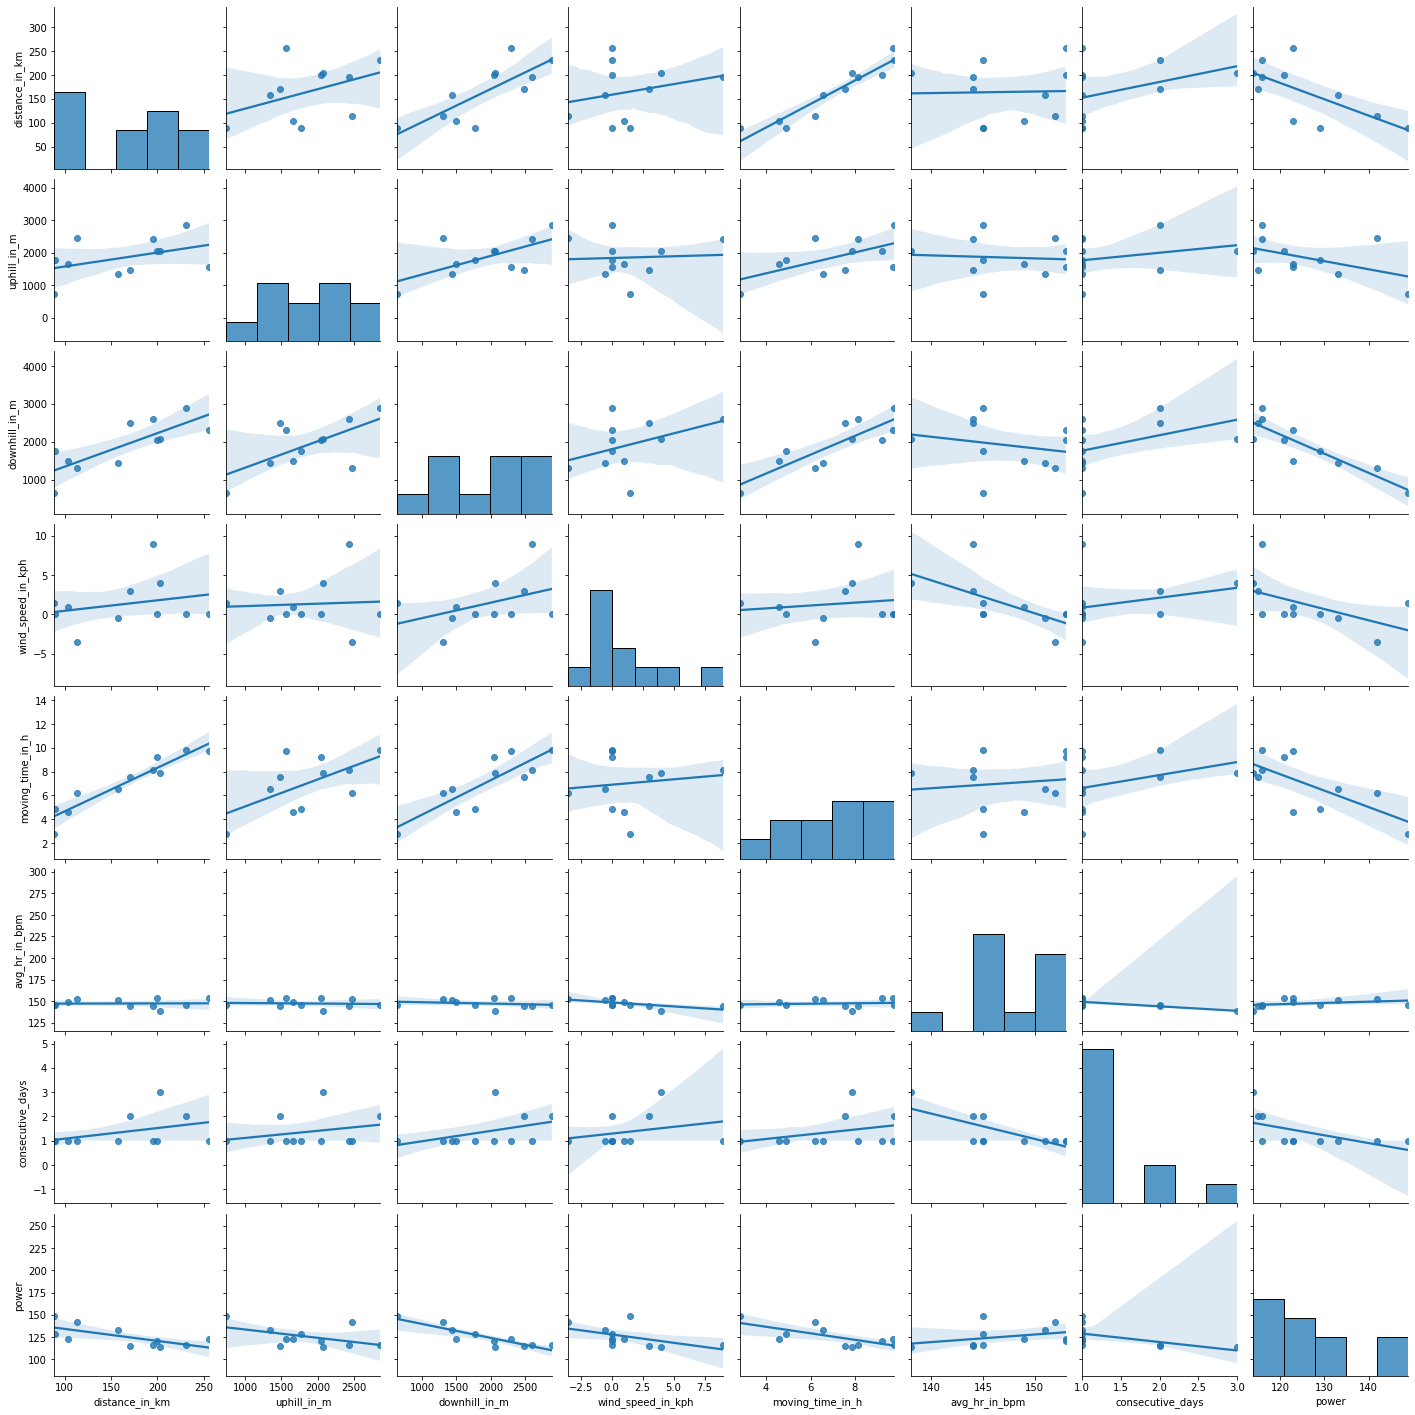

time: 7.48 s (started: 2021-07-25 13:49:14 -03:00)


In [12]:
sns.pairplot(df_with_power, kind='reg')
plt.show()

In [13]:
y = df_with_power.avg_hr_in_bpm
X = df_with_power.loc[:, {'power'}]
results = sm.GLS(y, X).fit()
results.summary()

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 GLS Regression Results                                
=======================================================================================
Dep. Variable:          avg_hr_in_bpm   R-squared (uncentered):                   0.993
Model:                            GLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              1466.
Date:                Sun, 25 Jul 2021   Prob (F-statistic):                    3.52e-12
Time:                        13:49:22   Log-Likelihood:                         -43.051
No. Observations:                  11   AIC:                                      88.10
Df Residuals:                      10   BIC:                                      88.50
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
power          1.1644      0.030     38.292      0.000       1.097       1.232
==============================================================================
Omnibus:                        6.730   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                3.150
Skew:                          -1.277   Prob(JB):                        0.207
Kurtosis:                       3.589   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

time: 9.51 ms (started: 2021-07-25 13:49:22 -03:00)


In [14]:
FEATURES = {'distance_in_km',
            'uphill_in_m',
            'downhill_in_m',
            'wind_speed_in_kph',
            'avg_hr_in_bpm',
            'consecutive_days',
            'power'}

y = df_with_power.moving_time_in_h
X = df_with_power.loc[:, FEATURES]

results = sm.GLS(y, X).fit()
results.summary()

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 GLS Regression Results                                
=======================================================================================
Dep. Variable:       moving_time_in_h   R-squared (uncentered):                   0.998
Model:                            GLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              280.3
Date:                Sun, 25 Jul 2021   Prob (F-statistic):                    3.25e-05
Time:                        13:49:22   Log-Likelihood:                         -3.4587
No. Observations:                  11   AIC:                                      20.92
Df Residuals:                       4   BIC:                                      23.70
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
wind_speed_in_kph    -0.0948      0.065     -1.470      0.216      -0.274       0.084
avg_hr_in_bpm         0.0283      0.033      0.852      0.442      -0.064       0.121
power                -0.0275      0.032     -0.855      0.441      -0.117       0.062
uphill_in_m           0.0006      0.000      1.598      0.185      -0.000       0.002
consecutive_days     -0.1615      0.291     -0.556      0.608      -0.968       0.645
distance_in_km        0.0278      0.005      5.464      0.005       0.014       0.042
downhill_in_m         0.0005      0.001      0.632      0.562      -0.002       0.002
==============================================================================
Omnibus:                        0.344   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.392
Skew:                          -0.319   Prob(JB):                        0.822
Kurtosis:                       2.331   Cond. No.                     4.89e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

time: 12.3 ms (started: 2021-07-25 13:49:22 -03:00)


In [15]:
FEATURES = {'distance_in_km',
            'uphill_in_m',
            'downhill_in_m',
            'wind_speed_in_kph',
            'avg_hr_in_bpm',
            'consecutive_days'}

y = df.moving_time_in_h
X = df.loc[:, FEATURES]

results = sm.GLS(y, X).fit()
results.summary()

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 GLS Regression Results                                
=======================================================================================
Dep. Variable:       moving_time_in_h   R-squared (uncentered):                   0.996
Model:                            GLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              456.4
Date:                Sun, 25 Jul 2021   Prob (F-statistic):                    1.57e-12
Time:                        13:49:22   Log-Likelihood:                         -13.674
No. Observations:                  17   AIC:                                      39.35
Df Residuals:                      11   BIC:                                      44.35
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
wind_speed_in_kph    -0.1585      0.055     -2.878      0.015      -0.280      -0.037
avg_hr_in_bpm         0.0047      0.004      1.132      0.282      -0.004       0.014
downhill_in_m         0.0005      0.000      1.122      0.286      -0.000       0.001
uphill_in_m           0.0004      0.000      1.035      0.323      -0.000       0.001
consecutive_days      0.2175      0.277      0.784      0.449      -0.393       0.828
distance_in_km        0.0282      0.005      6.008      0.000       0.018       0.038
==============================================================================
Omnibus:                        0.823   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.789
Skew:                           0.413   Prob(JB):                        0.674
Kurtosis:                       2.343   Cond. No.                     6.01e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

time: 11.3 ms (started: 2021-07-25 13:49:22 -03:00)


## Bayesian Modelling

In [16]:
def summarize_trace(trace):
    print("-- median --")
    print(trace.posterior.median())
    print("-- std --")
    print(trace.posterior.std())
    print("-- std per median -- ")
    print(trace.posterior.std() / trace.posterior.median())
    pm.plot_trace(trace)
    plt.show()

    bfmi = np.max(pm.stats.bfmi(trace))
    max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace).values()).values
    (
        pm.plot_energy(trace, legend=False, figsize=(6, 4)).set_title(
            f"BFMI = {bfmi :.2e}\nGelman-Rubin = {max_gr :.2e}"
        )
    )
    plt.show()

    pm.plot_posterior(trace)
    plt.show()
    
    pd.plotting.scatter_matrix(trace.posterior.to_dataframe(), figsize=(20, 20))
    plt.show()

time: 482 µs (started: 2021-07-25 13:49:22 -03:00)


### Model 1

$$\hat{t} = \frac{x + \alpha u + \beta d}{v_f + \gamma w}$$

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, gamma, v_f, beta, alpha]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 34 seconds.


-- median --
<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 -0.006089
    alpha    float64 0.02035
    v_f      float64 26.88
    gamma    float64 0.5531
    sigma    float64 0.5959
-- std --
<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 0.004417
    alpha    float64 0.004641
    v_f      float64 1.366
    gamma    float64 0.109
    sigma    float64 0.1291
-- std per median -- 
<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 -0.7254
    alpha    float64 0.2281
    v_f      float64 0.05081
    gamma    float64 0.1971
    sigma    float64 0.2167


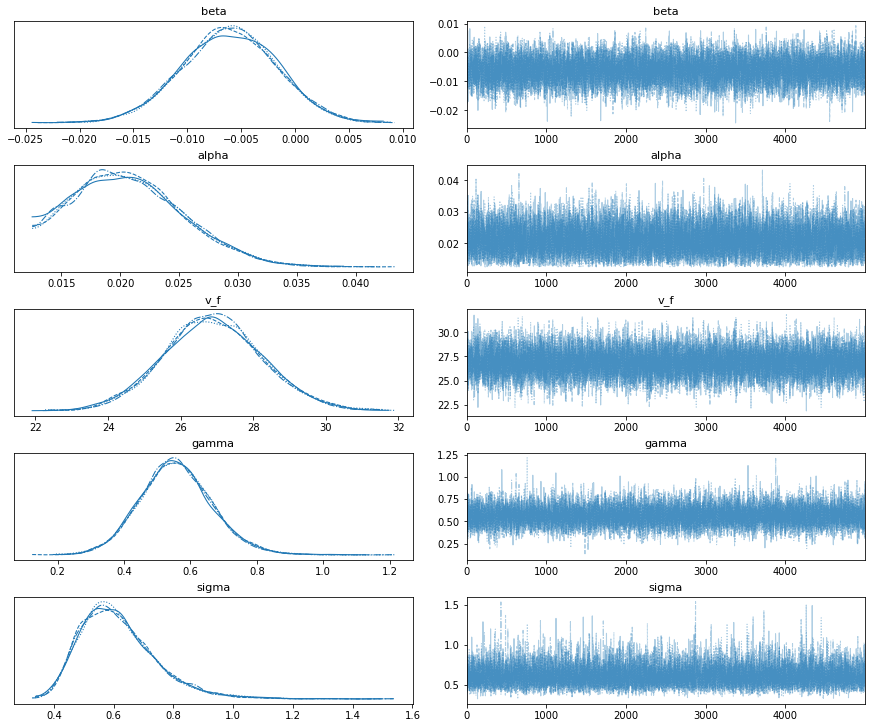

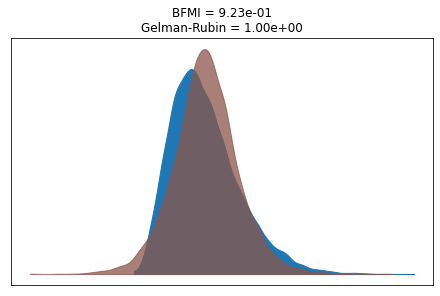

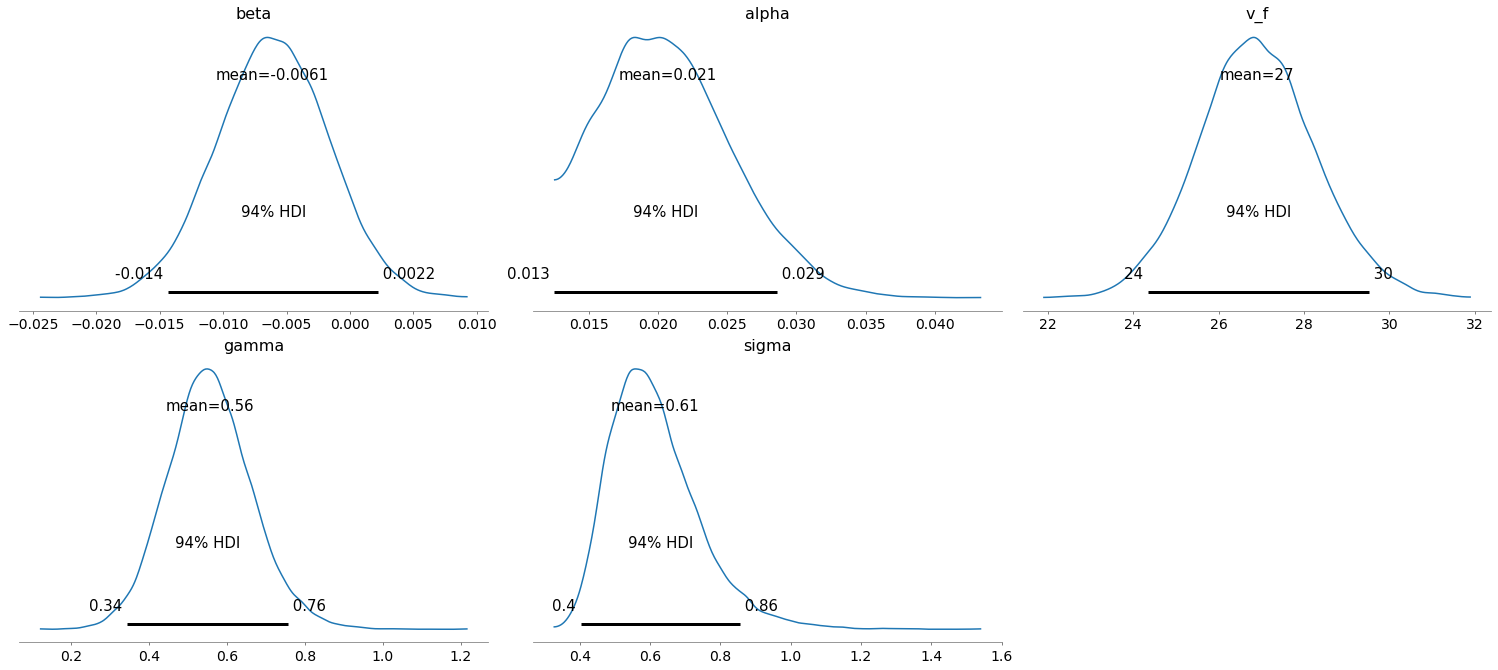

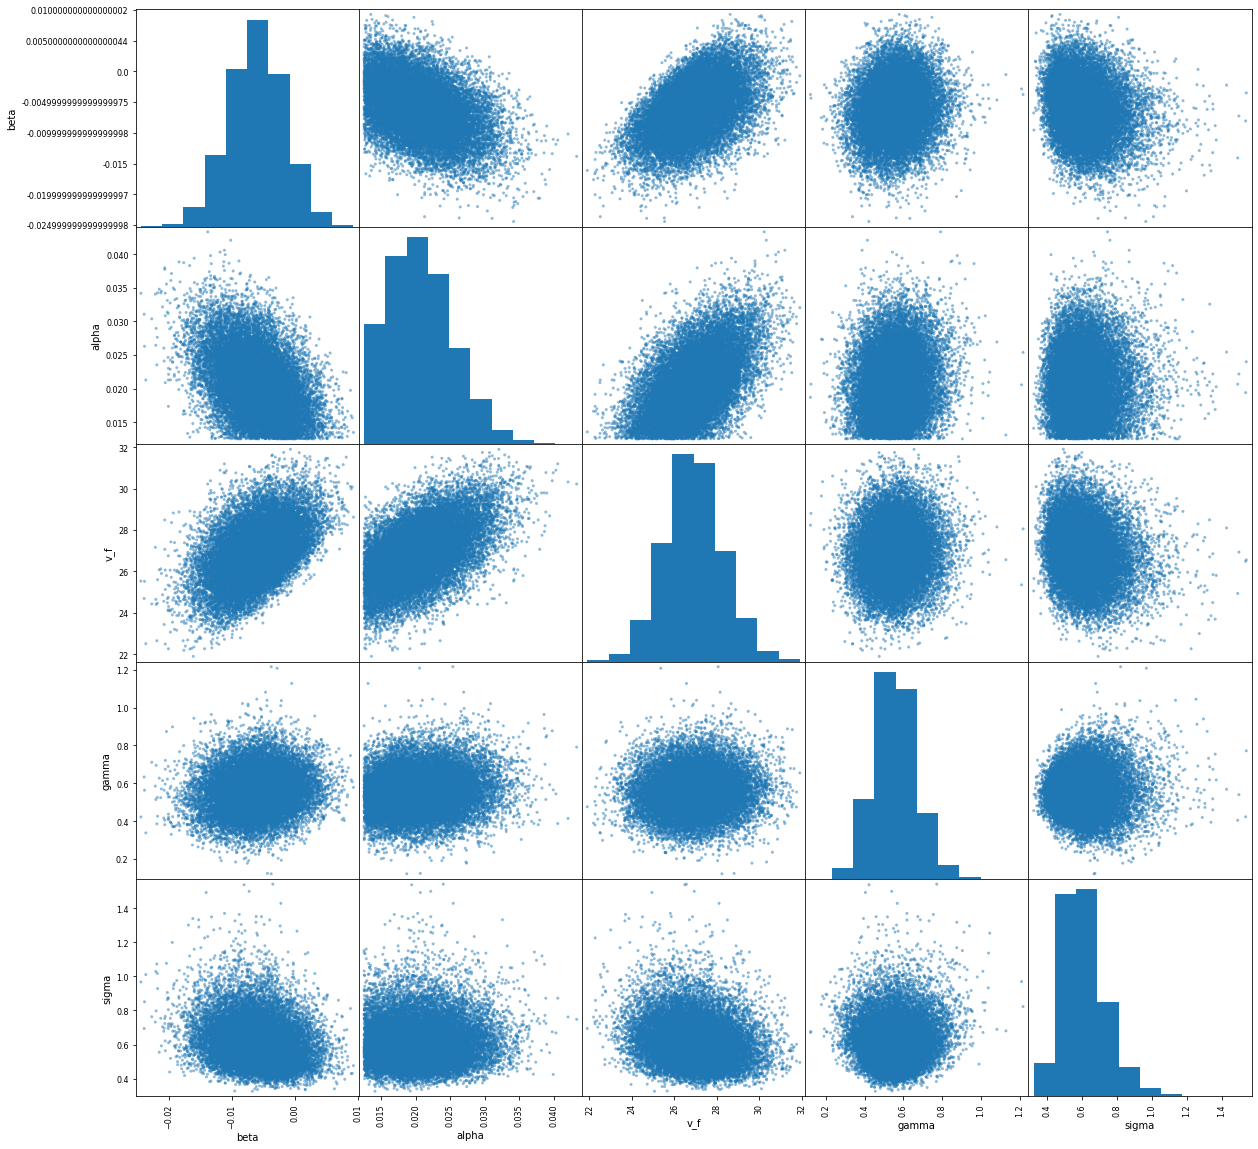

time: 44.2 s (started: 2021-07-25 13:49:22 -03:00)


In [17]:
with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=1/80,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    v_f = pm.TruncatedNormal('v_f', 
                             mu=25.5,
                             sigma=2,
                             lower=20,
                             upper=32)
    
    gamma = pm.TruncatedNormal('gamma', 
                               mu=2/3, 
                               sigma=1/2, 
                               lower=0.0)
    
    model = (alpha * df.uphill_in_m + beta * df.downhill_in_m)
    model += df.distance_in_km
    model /= (v_f + gamma * df.wind_speed_in_kph)
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(5_000, 
                      tune=1_000,
                      target_accept=0.95,
                      return_inferencedata=True)
    
summarize_trace(trace)

### Model 2

$$\hat{t} = \frac{x + \alpha u (1 - \epsilon) + \beta d \epsilon^2}{v_f + \gamma w}$$

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, epsilon, gamma, v_f, beta, alpha]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 33 seconds.


-- median --
<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 -0.007507
    alpha    float64 0.02423
    v_f      float64 26.49
    gamma    float64 0.5483
    epsilon  float64 0.4067
    sigma    float64 0.5889
-- std --
<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 0.005647
    alpha    float64 0.006956
    v_f      float64 1.319
    gamma    float64 0.1079
    epsilon  float64 0.1685
    sigma    float64 0.1264
-- std per median -- 
<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 -0.7523
    alpha    float64 0.2871
    v_f      float64 0.04979
    gamma    float64 0.1968
    epsilon  float64 0.4142
    sigma    float64 0.2147


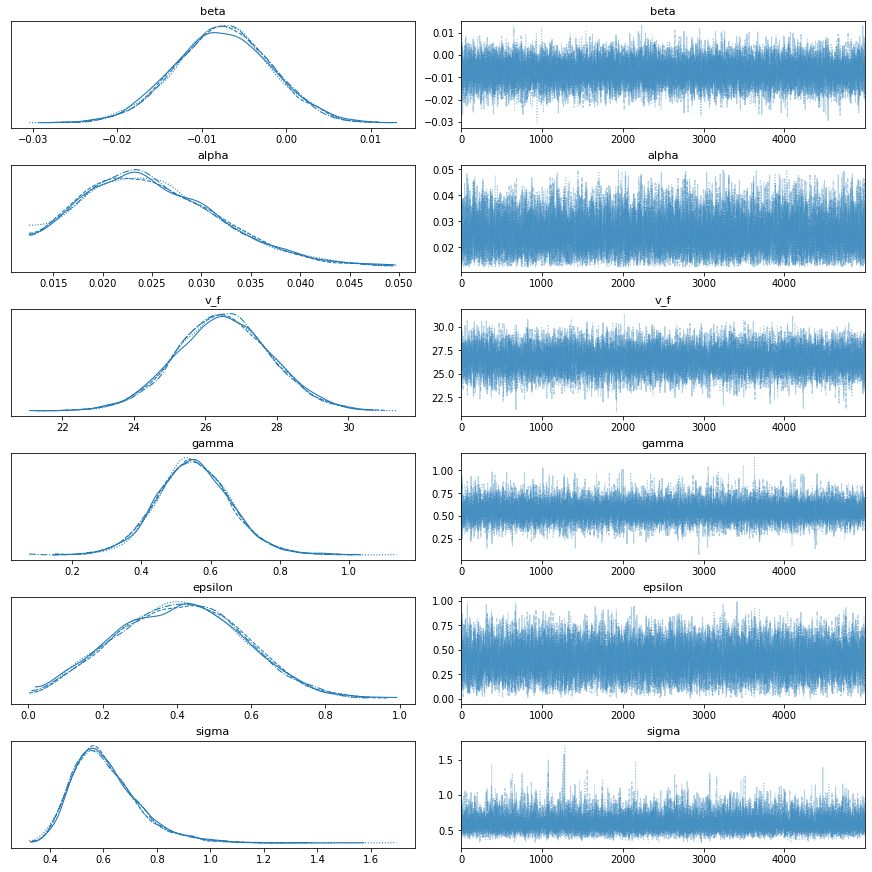

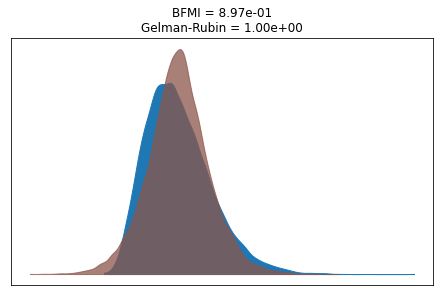

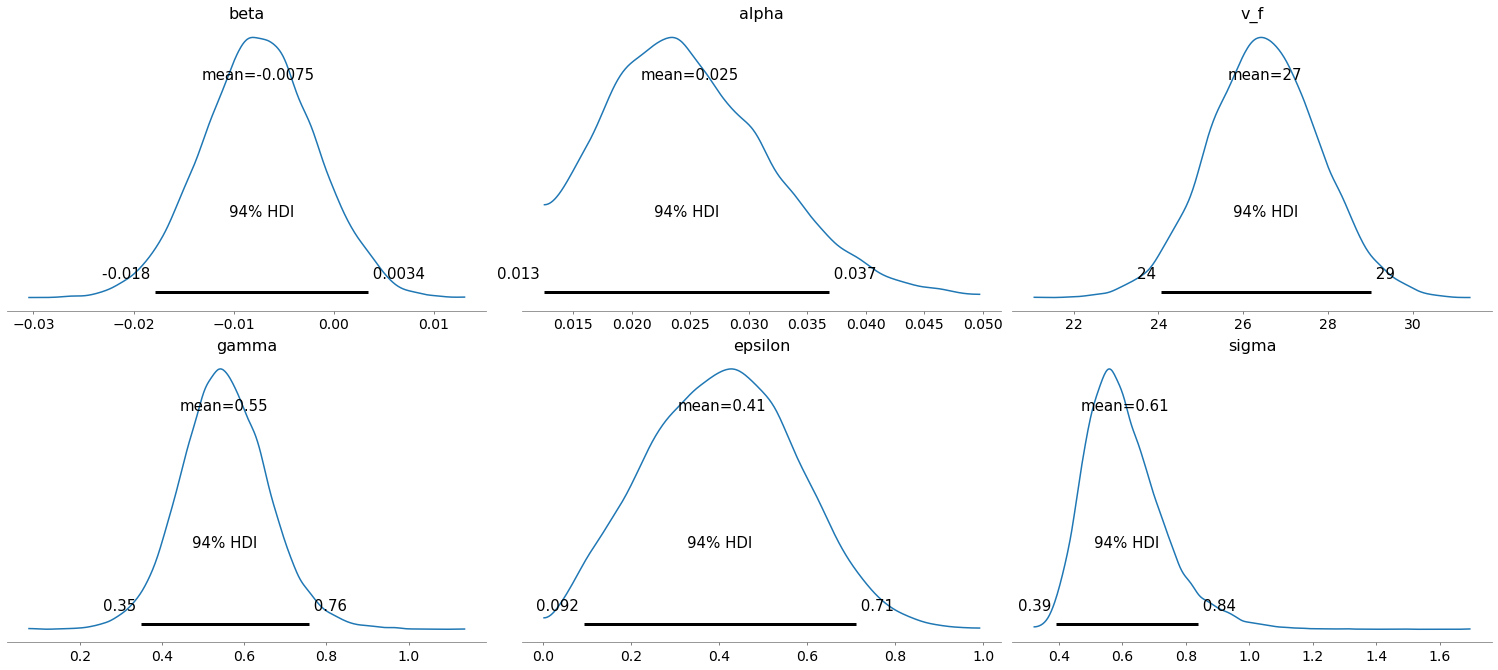

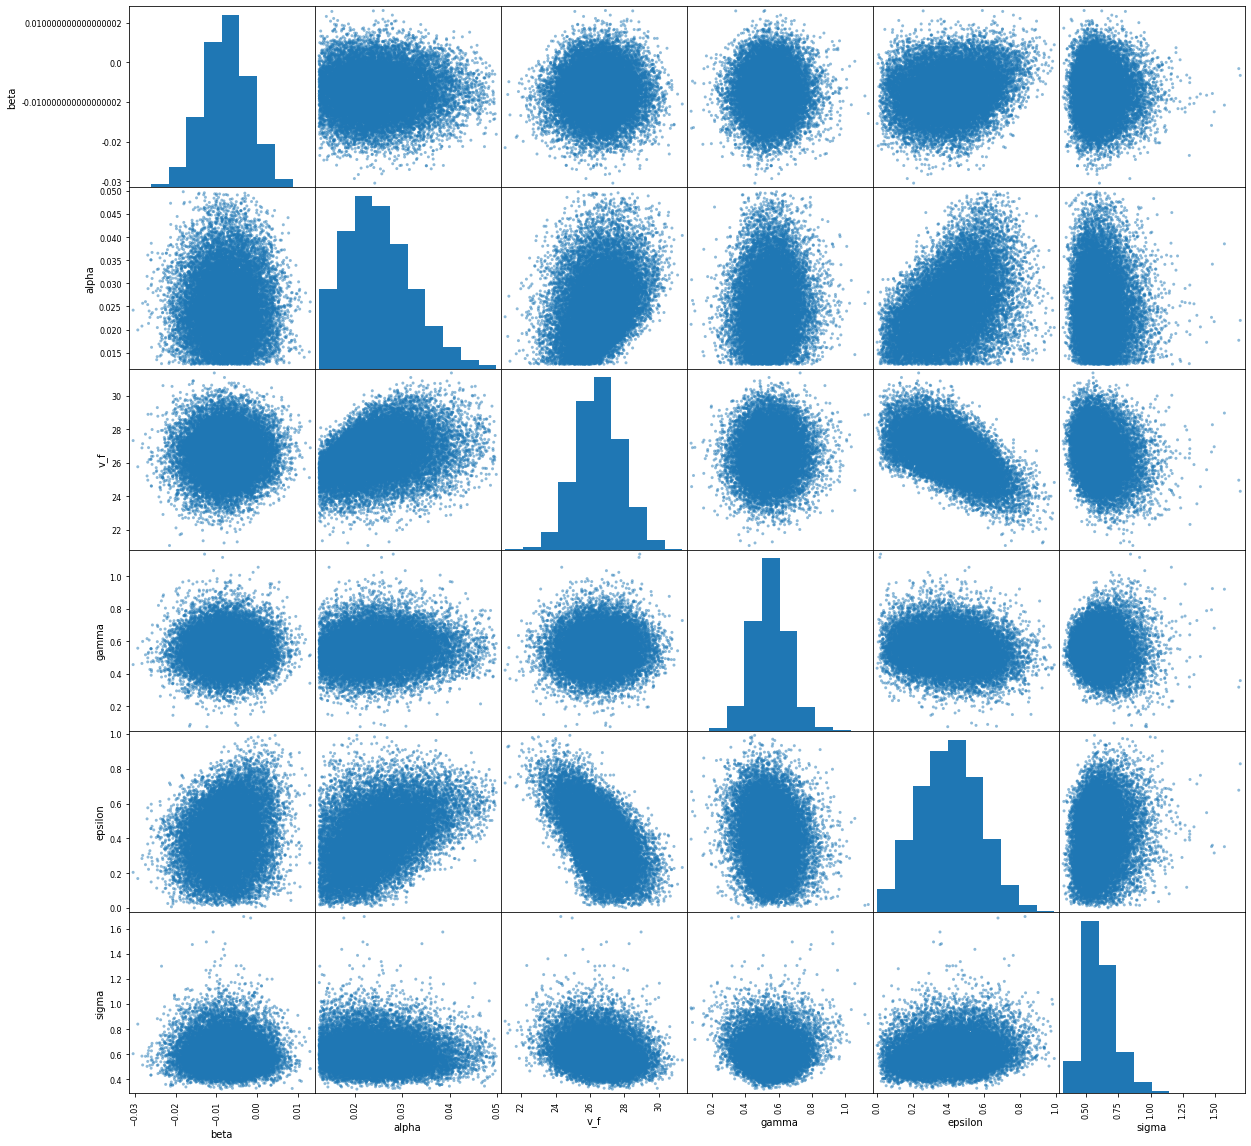

time: 46.5 s (started: 2021-07-24 17:34:42 -03:00)


In [10]:
import pymc3 as pm

with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=1/80,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    v_f = pm.TruncatedNormal('v_f', 
                             mu=25.5,
                             sigma=2,
                             lower=20,
                             upper=32)
    
    gamma = pm.TruncatedNormal('gamma', 
                               mu=2/3, 
                               sigma=1/2, 
                               lower=0.0)
    
    epsilon = pm.Beta('epsilon', 2, 1.5)
    
    model = alpha * df.uphill_in_m * (1 - epsilon)
    model += beta * df.downhill_in_m * (epsilon ** 2)
    model += df.distance_in_km
    model /= (v_f + gamma * df.wind_speed_in_kph)
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(5_000, 
                      tune=1_000,
                      target_accept=0.95,
                      return_inferencedata=True)

summarize_trace(trace)

### Model 3

$$\hat{t} = \frac{x + \alpha u (1 - \epsilon) \Psi + \beta d \epsilon^2}{v_f \sqrt{\Psi} + \gamma w}$$

$$\Psi = (h - h_0) \Psi_0$$

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, psi_0, h_0, epsilon, gamma, v_f, beta, alpha]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 61 seconds.


-- median --
<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 -0.007684
    alpha    float64 0.02248
    v_f      float64 25.34
    gamma    float64 0.6351
    epsilon  float64 0.5023
    h_0      float64 88.84
    psi_0    float64 0.04009
    sigma    float64 0.7951
-- std --
<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 0.005544
    alpha    float64 0.006708
    v_f      float64 1.954
    gamma    float64 0.1681
    epsilon  float64 0.1752
    h_0      float64 7.376
    psi_0    float64 0.01012
    sigma    float64 0.1852
-- std per median -- 
<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 -0.7215
    alpha    float64 0.2984
    v_f      float64 0.0771
    gamma    float64 0.2647
    epsilon  float64 0.3489
    h_0      float64 0.08303
    psi_0    float64 0.2526
    sigma    float64 0.233


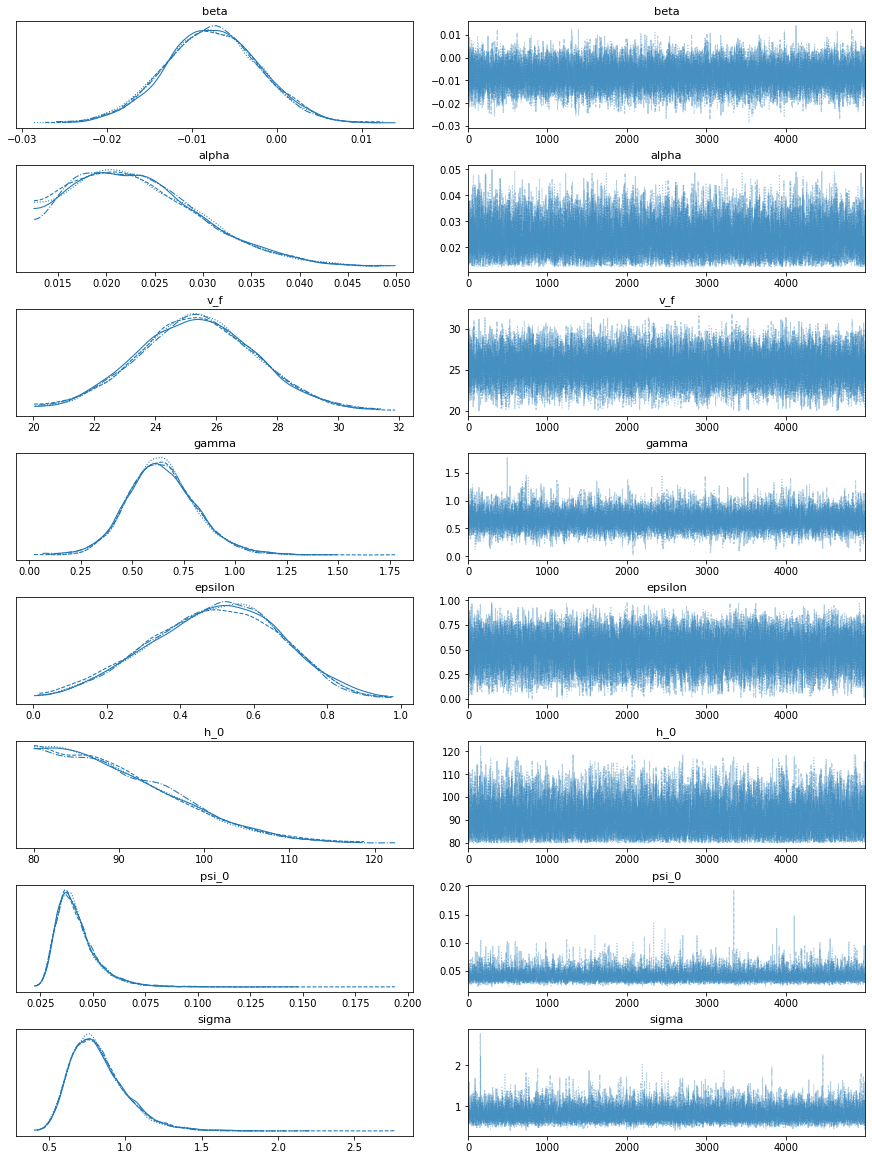

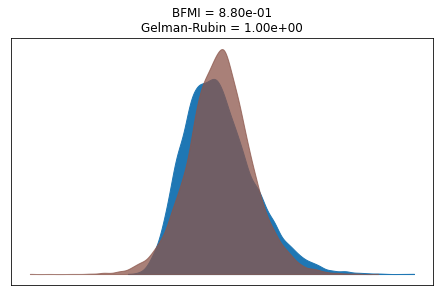

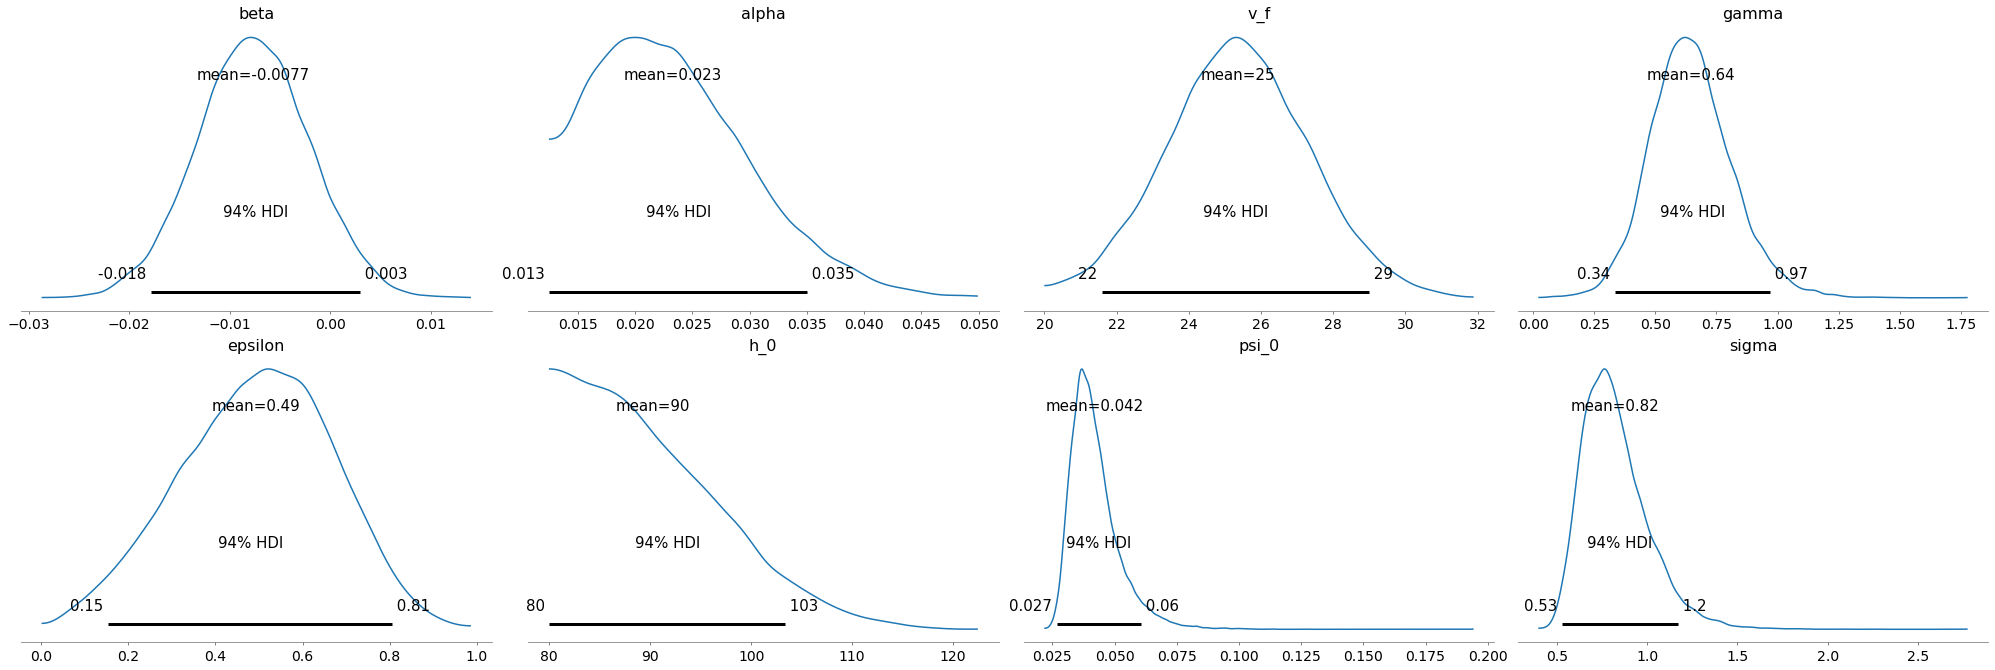

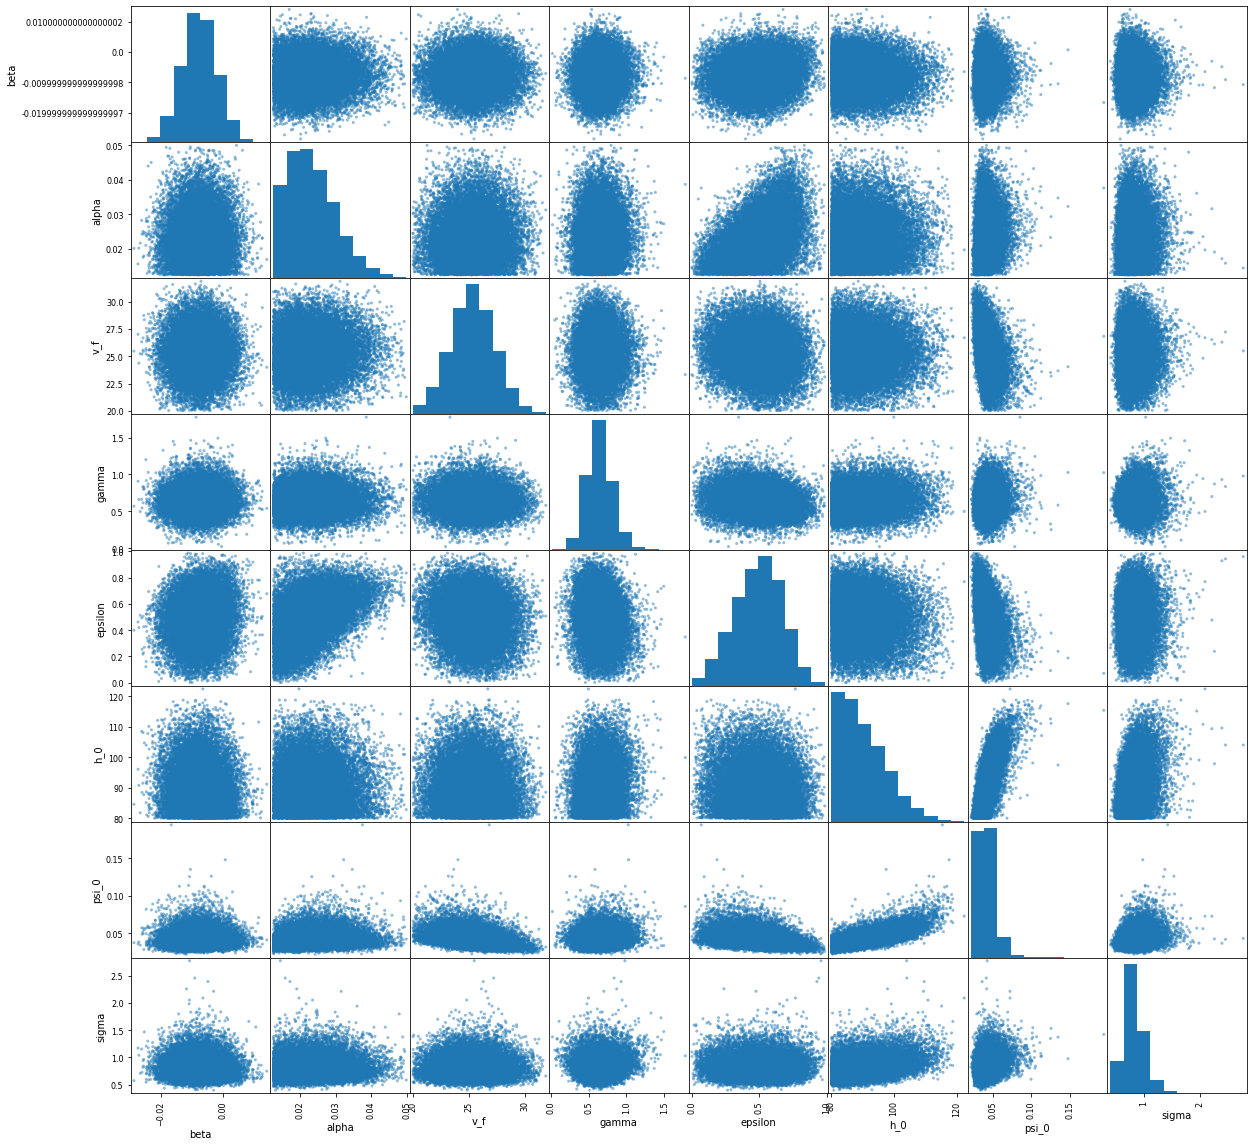

time: 1min 20s (started: 2021-07-24 17:35:28 -03:00)


In [11]:
with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=1/80,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    v_f = pm.TruncatedNormal('v_f', 
                             mu=25.5,
                             sigma=2,
                             lower=20,
                             upper=32)
    
    gamma = pm.TruncatedNormal('gamma', 
                               mu=2/3, 
                               sigma=1/2, 
                               lower=0.0)
    
    epsilon = pm.Beta('epsilon', 2, 1.5)
    
    h = df.avg_hr_in_bpm
    h_0 = pm.TruncatedNormal('h_0', 
                             mu=105,
                             sigma=20,
                             lower=80,
                             upper=125)
    psi_0 = pm.TruncatedNormal('psi_0', 
                               mu=15, 
                               sigma=10,
                               lower=0.0)
    
    psi = psi_0 * (-h_0 + h)
    
    model = alpha * df.uphill_in_m * (1 - epsilon) * psi
    model += beta * df.downhill_in_m * (epsilon ** 2)
    model += df.distance_in_km
    model /= (v_f * (psi ** 1/2) + gamma * df.wind_speed_in_kph)
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(5_000, 
                      tune=1_000,
                      target_accept=0.95,
                      return_inferencedata=True)
    
summarize_trace(trace)

### Model 4

$$\hat{t} = \frac{x + \alpha u \Psi + \beta d}{v_f \sqrt{\Psi} + \gamma w}$$

$$\Psi = (h - h_0) \Psi_0$$

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, psi_0, h_0, epsilon, gamma, v_f, beta, alpha]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 53 seconds.


-- median --
<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 -0.007404
    alpha    float64 0.0165
    v_f      float64 25.8
    gamma    float64 0.6583
    epsilon  float64 0.5853
    h_0      float64 91.33
    psi_0    float64 0.04546
    sigma    float64 0.8599
-- std --
<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 0.005185
    alpha    float64 0.003587
    v_f      float64 1.954
    gamma    float64 0.196
    epsilon  float64 0.2321
    h_0      float64 8.747
    psi_0    float64 0.02318
    sigma    float64 0.2106
-- std per median -- 
<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 -0.7003
    alpha    float64 0.2174
    v_f      float64 0.07573
    gamma    float64 0.2978
    epsilon  float64 0.3965
    h_0      float64 0.09577
    psi_0    float64 0.5099
    sigma    float64 0.2449


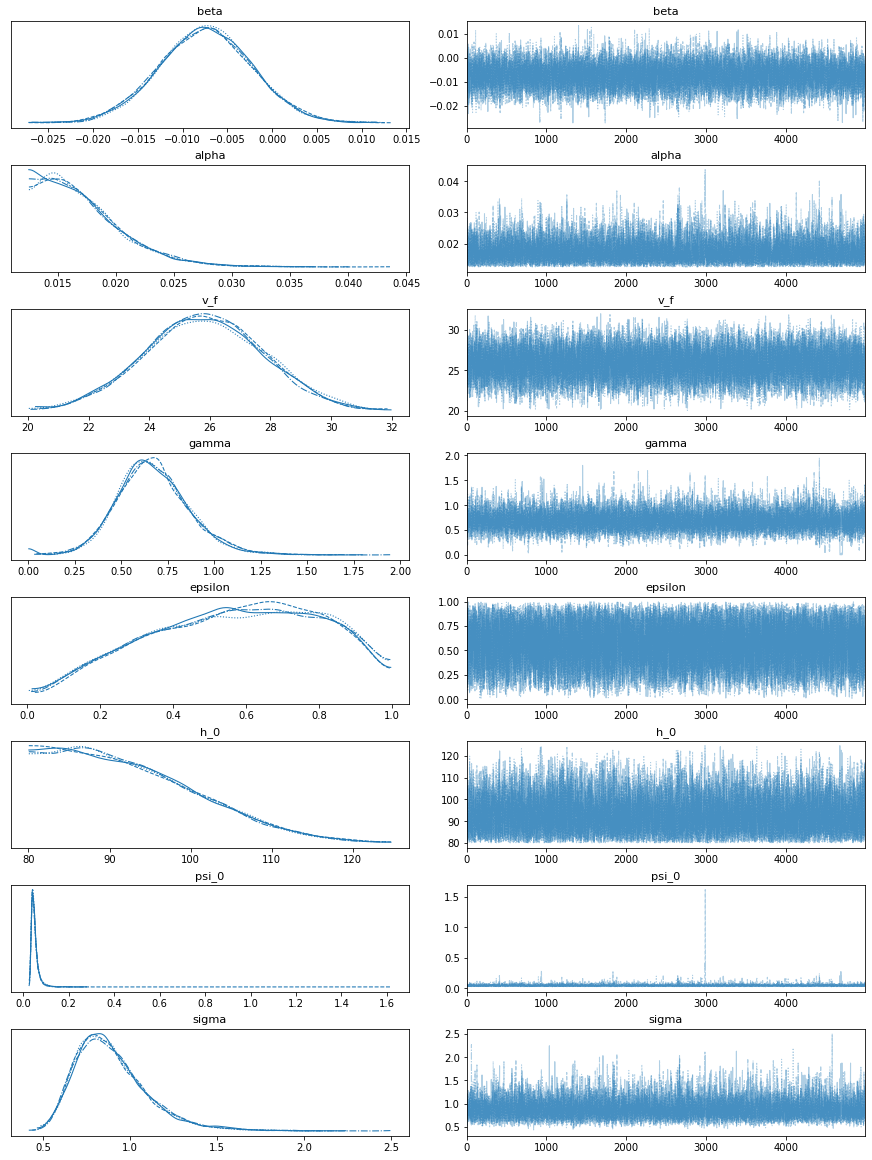

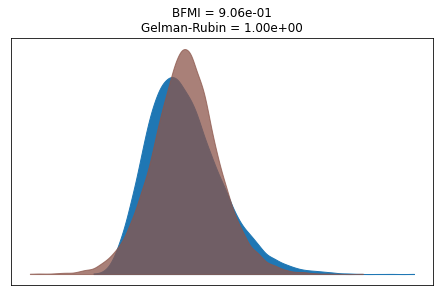

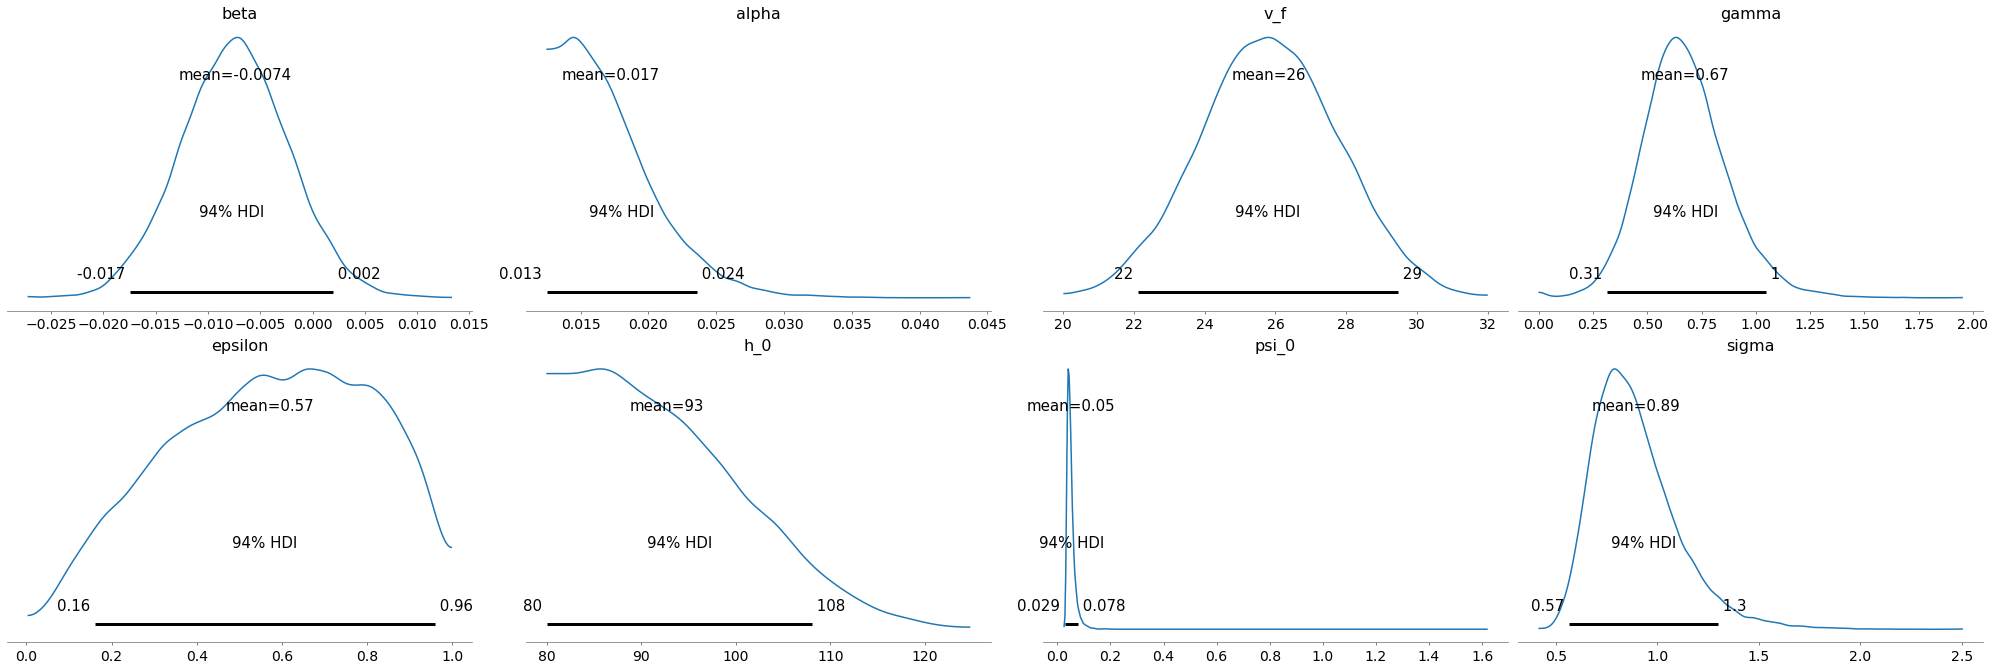

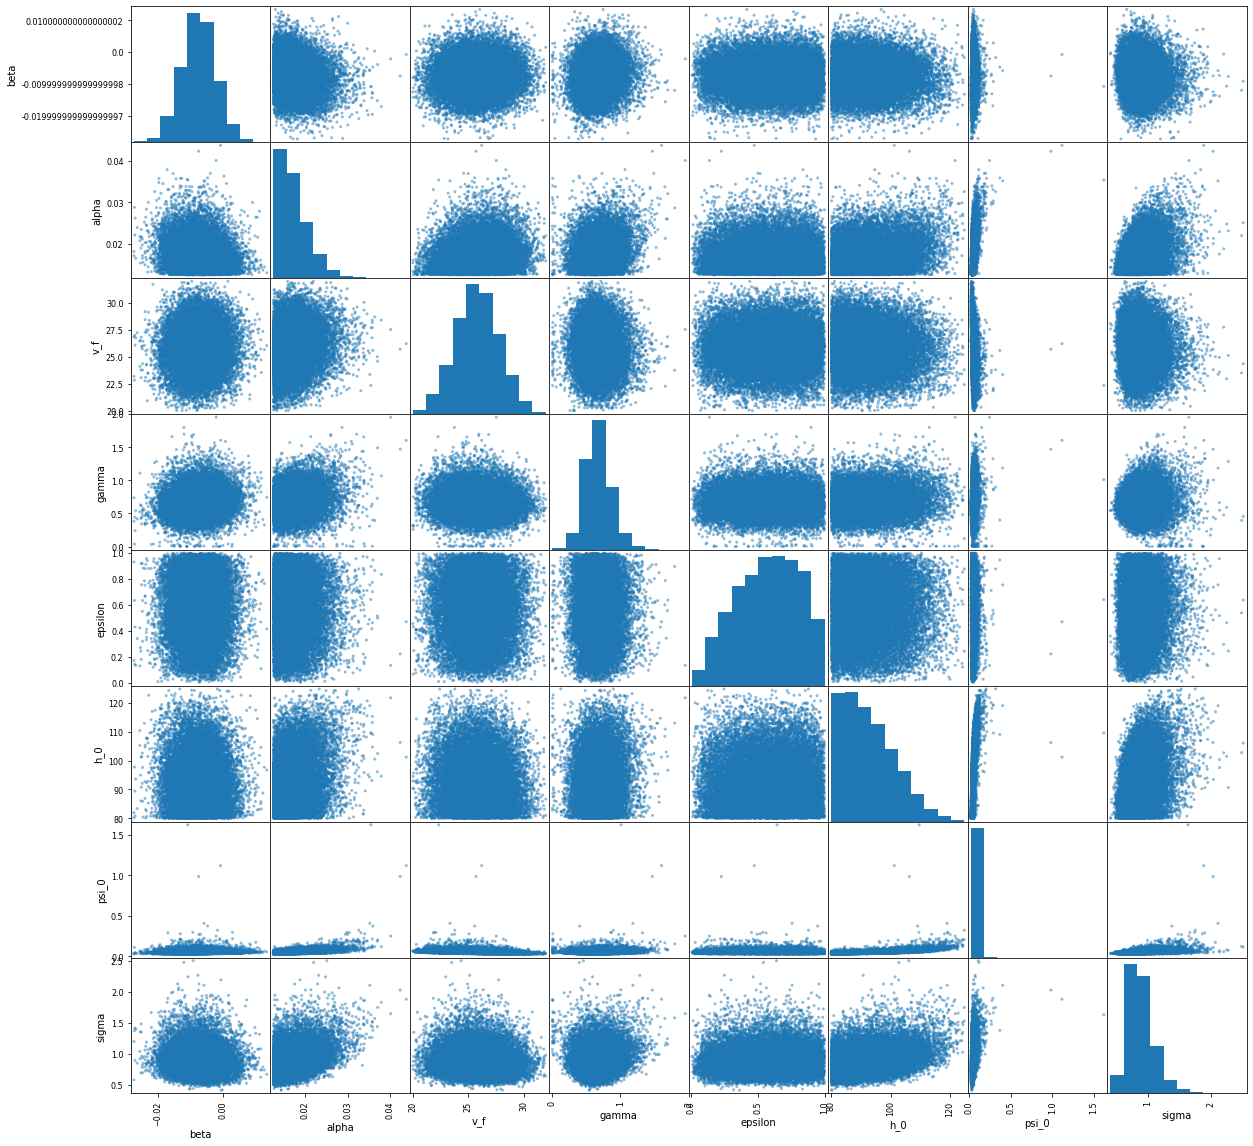

time: 1min 11s (started: 2021-07-24 17:36:49 -03:00)


In [12]:
import pymc3 as pm

with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=1/80,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    v_f = pm.TruncatedNormal('v_f', 
                             mu=25.5,
                             sigma=2,
                             lower=20,
                             upper=32)
    
    gamma = pm.TruncatedNormal('gamma', 
                               mu=2/3, 
                               sigma=1/2, 
                               lower=0.0)
    
    epsilon = pm.Beta('epsilon', 2, 1.5)
    
    h = df.avg_hr_in_bpm
    h_0 = pm.TruncatedNormal('h_0', 
                             mu=105,
                             sigma=20,
                             lower=80,
                             upper=125)
    psi_0 = pm.TruncatedNormal('psi_0', 
                               mu=15, 
                               sigma=10,
                               lower=0.0)
    
    psi = psi_0 * (-h_0 + h)
    
    model = alpha * df.uphill_in_m * psi
    model += beta * df.downhill_in_m
    model += df.distance_in_km
    model /= (v_f * (psi ** 1/2) + gamma * df.wind_speed_in_kph)
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(5_000, 
                      tune=1_000,
                      target_accept=0.95,
                      return_inferencedata=True)
    
summarize_trace(trace)

### Model 5

$$\hat{t} = \frac{x + \alpha u+ \beta d}{v_f}$$

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, v_f, beta, alpha]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 26 seconds.


-- median --
<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 -0.009361
    alpha    float64 0.01917
    v_f      float64 27.31
    sigma    float64 1.093
-- std --
<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 0.004586
    alpha    float64 0.004791
    v_f      float64 1.485
    sigma    float64 0.2254
-- std per median -- 
<xarray.Dataset>
Dimensions:  ()
Data variables:
    beta     float64 -0.4899
    alpha    float64 0.25
    v_f      float64 0.05438
    sigma    float64 0.2061


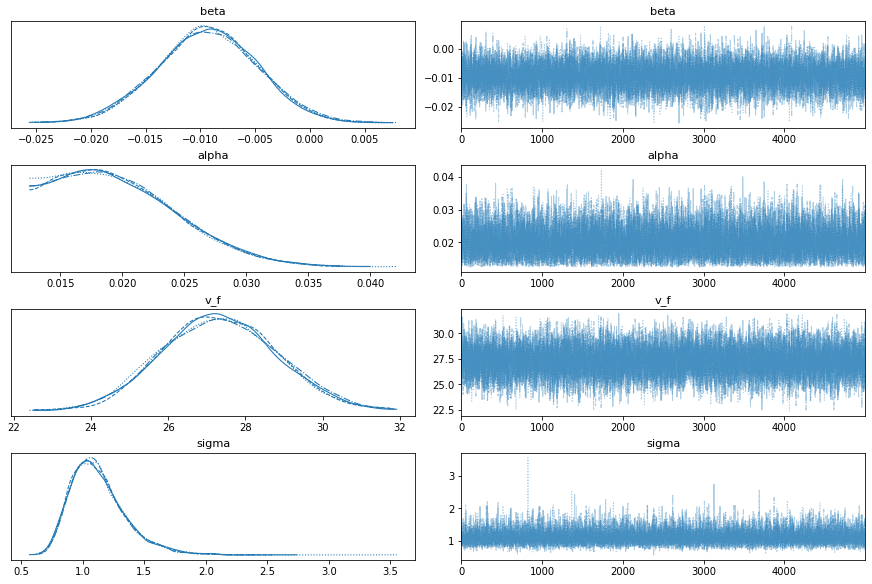

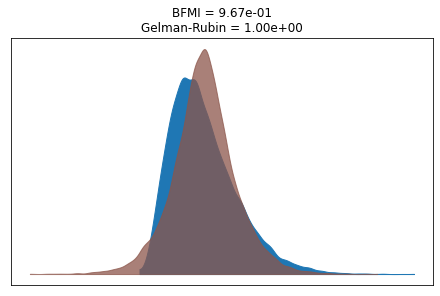

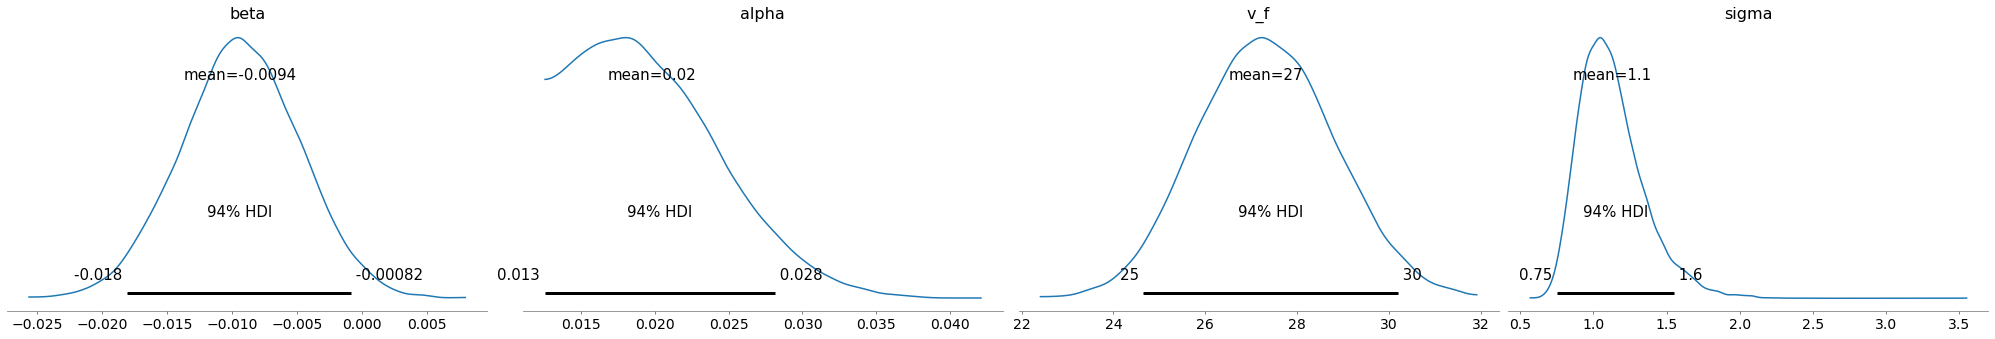

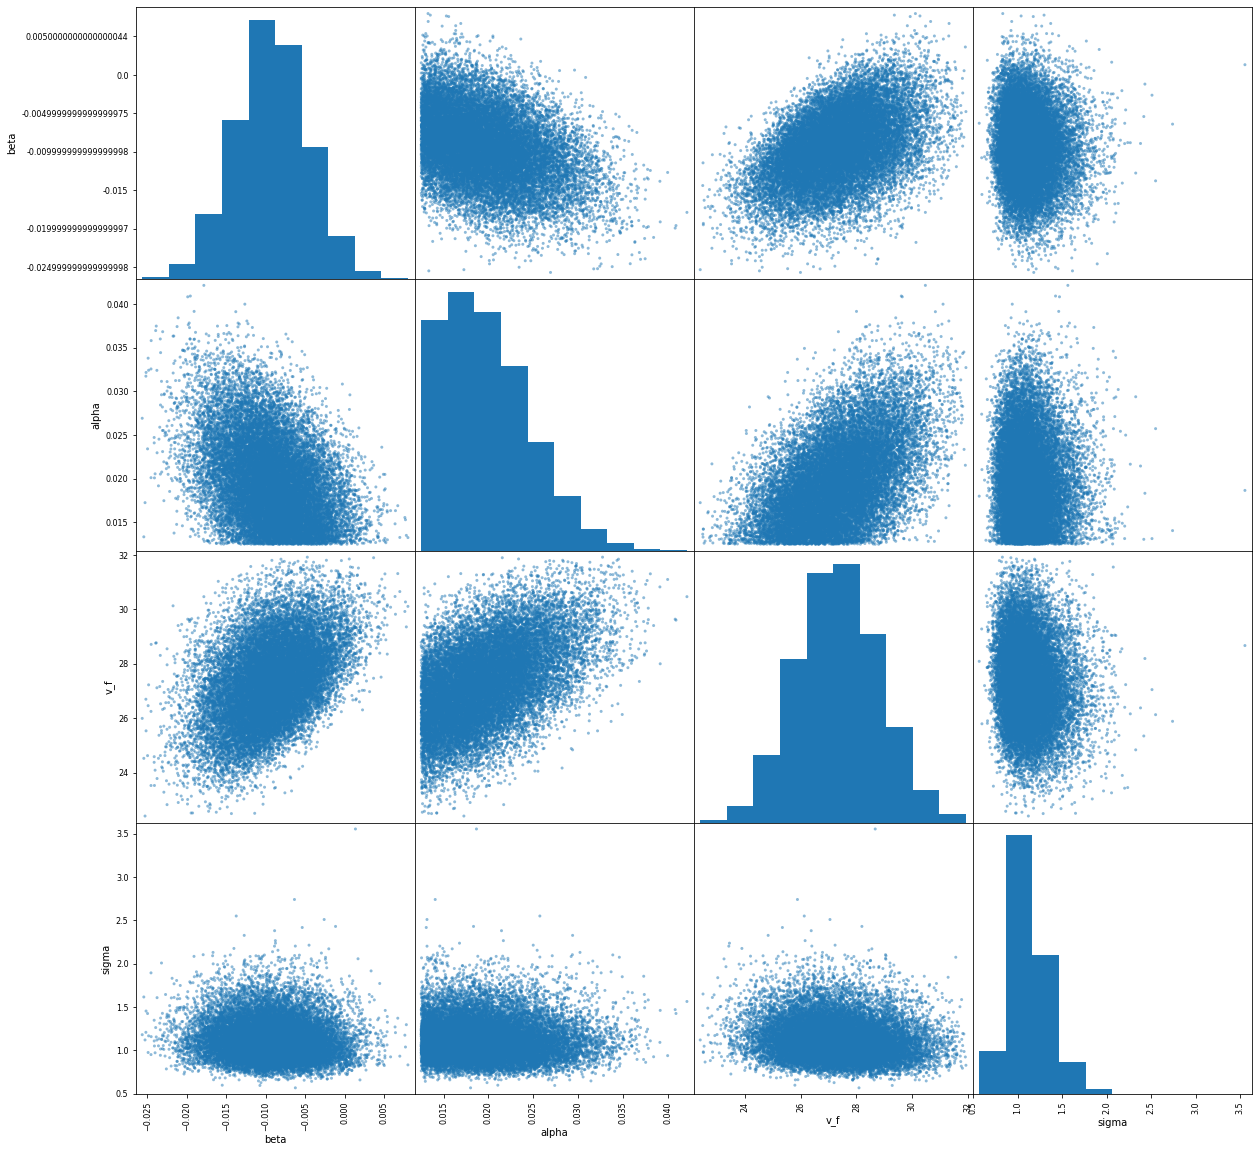

time: 34.6 s (started: 2021-07-24 17:38:01 -03:00)


In [13]:
import pymc3 as pm

with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=1/80,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    v_f = pm.TruncatedNormal('v_f', 
                             mu=25.5,
                             sigma=2,
                             lower=20,
                             upper=32)
    
    model = (alpha * df.uphill_in_m + beta * df.downhill_in_m)
    model += df.distance_in_km
    model /= v_f
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(5_000, 
                      tune=1_000,
                      target_accept=0.95,
                      return_inferencedata=True)
    
summarize_trace(trace)

### Model 6

$$\hat{t} = \delta x + \alpha u + \beta d + \gamma w$$



In [14]:
import pymc3 as pm

with pm.Model() as model:
    
    delta = pm.Normal('delta', 
                               mu=1/25, 
                               sigma=1/50
                              )
    
    alpha = pm.Normal('alpha',
                               mu=1/500,
                               sigma=1/1000,
                           #    lower=0.0,
                           #    upper=1
                              )
    
    beta = pm.Normal('beta',
                               mu=-1/1000,
                               sigma=1/10,
                           #    upper=0.0
                             )
    
    gamma = pm.Normal('gamma',
                               mu=1/25,
                               sigma=1/25,
                             #  lower=0.0,
                             #  upper=1/10
                              )
    
    model = (alpha * df.uphill_in_m + beta * df.downhill_in_m)
    model += delta * df.distance_in_km + gamma * df.wind_speed_in_kph
    
    sigma = pm.HalfCauchy('sigma', beta=5, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(5_000, 
                      tune=1_000,
                      target_accept=0.95,
                      return_inferencedata=True)

summarize_trace(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, gamma, beta, alpha, delta]


RuntimeError: Chain 0 failed.

time: 17.3 s (started: 2021-07-24 17:38:36 -03:00)


### Model 7

$$\hat{t} = \frac{x + \alpha u + \beta d}{\eta \sqrt{h-h_0} + \gamma w}$$

In [ ]:
with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=0,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    eta = pm.TruncatedNormal('eta', 
                             mu=3,
                             sigma=1,
                             lower=1,
                             upper=5)
    
    gamma = pm.TruncatedNormal('gamma', 
                               mu=2/3, 
                               sigma=1/2, 
                               lower=0.0)
        
    h = df.avg_hr_in_bpm
    h_0 = pm.TruncatedNormal('h_0', 
                             mu=105,
                             sigma=20,
                             lower=60,
                             upper=125)
        
    model = alpha * df.uphill_in_m
    model += beta * df.downhill_in_m
    model += df.distance_in_km
    model /= (eta * (-h_0 + h) ** (1/2) + gamma * df.wind_speed_in_kph)
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(5_000, 
                      tune=1_000,
                      target_accept=0.95,
                      return_inferencedata=True)
    
summarize_trace(trace)

### Model 7b

$$\hat{t} = \frac{x + \alpha u + \beta d}{\eta \sqrt{P} + \gamma w}$$

In [ ]:
_df = df
df = df_with_power

with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=0,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    eta = pm.TruncatedNormal('eta', 
                             mu=3,
                             sigma=1,
                             lower=1,
                             upper=5)
    
    gamma = pm.TruncatedNormal('gamma', 
                               mu=2/3, 
                               sigma=1/2, 
                               lower=0.0)
    
    P = df.power
                
    model = alpha * df.uphill_in_m
    model += beta * df.downhill_in_m
    model += df.distance_in_km
    model /= (eta * P ** (1/2) + gamma * df.wind_speed_in_kph)
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(5_000, 
                      tune=1_000,
                      target_accept=0.95,
                      return_inferencedata=True)
    
summarize_trace(trace)
df = _df

### Model 8

$$\hat{t} = \frac{x + \alpha u + \beta d}{v_f + \gamma w} \cdot \Psi_0 \sqrt{h-h_0}$$

In [ ]:
with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=1/100,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    v_f = pm.TruncatedNormal('v_f', 
                             mu=25.5,
                             sigma=1,
                             lower=22,
                             upper=28)
    
    gamma = pm.TruncatedNormal('gamma', 
                               mu=2/3, 
                               sigma=1/2, 
                               lower=0.0)
    
    h = df.avg_hr_in_bpm
    h_0 = pm.TruncatedNormal('h_0', 
                             mu=110,
                             sigma=10,
                             lower=60,
                             upper=130)
    psi_0 = pm.TruncatedNormal('psi',
                               mu=1/8,
                               sigma=1/16,
                               lower=0.05,
                               upper=0.2)
    
    model = (alpha * df.uphill_in_m + beta * df.downhill_in_m)
    model += df.distance_in_km
    model /= (v_f + gamma * df.wind_speed_in_kph)
    model *= psi_0 * (-h_0 + h) ** (1 / 2)
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(5_000, 
                      tune=1_000,
                      target_accept=0.95,
                      return_inferencedata=True)
    
summarize_trace(trace)

### Model 8b

$$\hat{t} = \frac{x + \alpha u + \beta d}{v_f + \gamma w} \cdot \Psi_0 \sqrt{P}$$

### Model 9


$$\hat{t} = \frac{x + \alpha u + \beta d}{(v_f + \gamma w) \cdot \psi_0 \sqrt{h-h_0}} $$

In [ ]:
with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=1/100,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    v_f = pm.TruncatedNormal('v_f', 
                             mu=25.5,
                             sigma=1,
                             lower=22,
                             upper=28)
    
    gamma = pm.TruncatedNormal('gamma', 
                               mu=2/3, 
                               sigma=1/2, 
                               lower=0.0)
    
    h = df.avg_hr_in_bpm
    h_0 = pm.TruncatedNormal('h_0', 
                             mu=110,
                             sigma=10,
                             lower=60,
                             upper=130)
    psi_0 = pm.TruncatedNormal('psi',
                               mu=1/7,
                               sigma=1/14,
                               lower=0.0,
                               upper=1/2)
    
    model = (alpha * df.uphill_in_m + beta * df.downhill_in_m)
    model += df.distance_in_km
    model /= (v_f + gamma * df.wind_speed_in_kph) * psi_0 * (-h_0 + h) ** (1 / 2)
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(5_000, 
                      tune=1_000,
                      target_accept=0.95,
                      return_inferencedata=True)
    
summarize_trace(trace)

### Model 9b

$$\hat{t} = \frac{x + \alpha u + \beta d}{(v_f + \gamma w) \cdot \psi_0 \sqrt{P}} $$

In [ ]:
_df = df
df = df_with_power

with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=1/100,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    v_f = pm.TruncatedNormal('v_f', 
                             mu=25.5,
                             sigma=1,
                             lower=22,
                             upper=28)
    
    gamma = pm.TruncatedNormal('gamma', 
                               mu=2/3, 
                               sigma=1/2, 
                               lower=0.0)
    
    
    P = df.power
    
    psi_0 = pm.TruncatedNormal('psi',
                               mu=1/11,
                               sigma=1/11,
                               lower=0.0,
                               upper=1/2)
    
    model = (alpha * df.uphill_in_m + beta * df.downhill_in_m)
    model += df.distance_in_km
    model /= (v_f + gamma * df.wind_speed_in_kph) * psi_0 * P ** (1 / 2)
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(5_000, 
                      tune=1_000,
                      target_accept=0.95,
                      return_inferencedata=True)
    
summarize_trace(trace)

df = _df

### Model 10

$$\hat{t} = \frac{x + \alpha u \Psi (1 - \epsilon) + \beta d \epsilon^2}{\eta \sqrt{\Psi} + \gamma w}$$

$$\Psi = \Psi_0 P$$

In [ ]:
_df = df
df = df_with_power

with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=0,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    eta = pm.TruncatedNormal('eta', 
                             mu=3,
                             sigma=3,
                             lower=0,
                             upper=25)
    
    gamma = pm.TruncatedNormal('gamma', 
                               mu=2/3, 
                               sigma=1/2, 
                               lower=0.0)
    
    epsilon = pm.Beta('epsilon', 2, 1.5)
    
    
    P = df.power
    
    psi_0 = pm.TruncatedNormal('psi',
                               mu=0.1,
                               sigma=0.2,
                               lower=0.0,
                               upper=1)
    
    psi = psi_0 * P
    
    model = alpha * df.uphill_in_m * (1 - epsilon) * psi
    model += beta * df.downhill_in_m * epsilon ** 2
    model += df.distance_in_km
    model /= (eta * psi ** (1/2) + gamma * df.wind_speed_in_kph)
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(5_000, 
                      tune=1_000,
                      target_accept=0.95,
                      return_inferencedata=True)
    
summarize_trace(trace)

df = _df

### Model 10b

$$\hat{t} = \frac{x + \alpha u \psi (1 - \epsilon) + \beta d \epsilon^2}{\eta \sqrt{\psi} + \gamma w}$$

$$\Psi = \psi_0 P + \psi_1 (h - h_0)$$

In [ ]:
_df = df
df = df_with_power

with pm.Model() as model:
    alpha = pm.TruncatedNormal('alpha', mu=1/50, 
                                        sigma=1/100,
                                        lower=0,
                                        upper=1/20)
    beta = pm.Normal('beta', 
                     mu=-1/120, 
                     sigma=1/180)
    
    eta = pm.TruncatedNormal('eta', 
                             mu=3,
                             sigma=3,
                             lower=0,
                             upper=25)
    
    gamma = pm.TruncatedNormal('gamma', 
                               mu=2/3, 
                               sigma=1/2, 
                               lower=0.0)
    
    epsilon = pm.Beta('epsilon', 2, 1.5)
    
    
    P = df.power
    
    psi_0 = pm.TruncatedNormal('psi_0',
                               mu=0.1,
                               sigma=0.2,
                               lower=0.0,
                               upper=1)
    
    psi_1 = pm.TruncatedNormal('psi_1',
                               mu=0.1,
                               sigma=0.2,
                               lower=0.0,
                               upper=1)
    
    h = df.avg_hr_in_bpm
    h_0 = pm.TruncatedNormal('h_0', 
                             mu=110,
                             sigma=15,
                             lower=60,
                             upper=130)
    
    psi = psi_0 * P + psi_1 * (-h_0 + h)
    
    model = alpha * df.uphill_in_m * psi * (1 - epsilon)
    model += beta * df.downhill_in_m * epsilon ** 2
    model += df.distance_in_km
    model /= (eta * psi ** (1/2) + gamma * df.wind_speed_in_kph)
    
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1)
    
    y = df.moving_time_in_h
    
    likelihood = pm.Normal('t', mu=model, sigma=sigma, observed=y)
    trace = pm.sample(5_000, 
                      tune=2_000,
                      target_accept=0.95,
                      return_inferencedata=True)
summarize_trace(trace)

df = _df